What should be the apt price for a computer?

When you purchase a new computer, you estimate its price based on its specifications like the Hard Drive, RAM, screen size etc.

In this case study, the task is to create a machine learning model which can predict the price of a computer based on its specs.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

## Data description
The business meaning of each column in the data is as below

* **price:** The Price of the computer
* **speed:** The speed
* **hd:** How much hard drive is present
* **ram:** How much ram is present in the computer
* **screen:** The screen size
* **cd:** Whether CD player is present or not
* **multi:** Are there multiple ports or not
* **premium:** If the computer premium quality
* **ads:** The ads value of the computer
* **trend:** The trend value of the computer

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

In [5]:
#Reading the Datasets

ComputerPricesData=pd.read_csv('G:/Study material/IVY Proschool/Python/Class Notes/Python Datasets/Regression Datasets/ComputerPricesData.csv',
                               encoding='latin')

In [6]:
ComputerPricesData.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


# Define the Problem Statement

**Create a ML model which can predict the apt price of a computer**
* Target Variable: price
* Predictors: RAM, HDD, CD, ports etc.

# Determining the type of Machine Learning

Based on the problem statement you can understand that we need to create a**supervised ML Regression model**, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

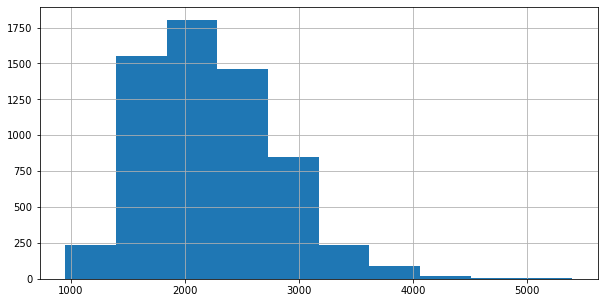

In [7]:
#Create a Histogram for Target Variable

ComputerPricesData['price'].hist(figsize=(10,5))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the price of the computer? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

* **head()** : This helps to see a few sample rows of the data
* **info()** : This provides the summarized information of the data
* **describe()** : This provides the descriptive statistical details of the data
* **nunique()**: This helps us to identify if a column is categorical or continuous


In [8]:
# Looking at sample rows in the data

ComputerPricesData.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [9]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning

ComputerPricesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [10]:
# Looking at the descriptive statistics of the data

ComputerPricesData.describe(include='all') 

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


In [12]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

ComputerPricesData.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

## Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created

* **price:** Continuous. Selected.This is the **Target Variable!**
* **speed:** Continuous. Selected
* **hd:** Continuous. Selected
* **ram:** Categorical. Selected
* **screen:** Categorical. Selected
* **cd:** Categorical. Selected
* **multi:** Categorical. Selected
* **premium:** Categorical. Selected
* **ads:** Continuous. Selected
* **trend:** Continuous. Selected

# Removing useless columns from the data

There are no qualitative columns in this data

# Visual Exploratory Data Analysis

* Categorical variables: Bar plot
* Continuous variables: Histogram

Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

Categorical Predictors:

'ram', 'screen', 'cd', 'multi'

We use bar charts to see how the data is distributed for these categorical columns.



In [14]:
def BarChart(Inp, Col):
    import matplotlib.pyplot as plt
    
    fig, SubPlot=plt.subplots(nrows=1, ncols=len(Col), figsize=(20,5))
    fig.suptitle('Bar Charts')
    
    for ColName, PlotNumber in zip(Col, range(len(Col))):
        Inp.groupby(ColName).size().plot(kind='bar', ax=SubPlot[PlotNumber])

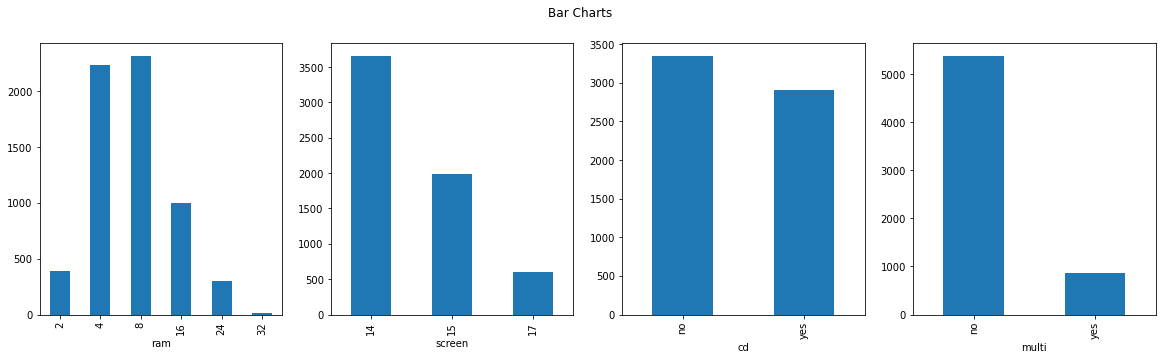

In [15]:
BarChart(Inp=ComputerPricesData, Col=['ram', 'screen', 'cd', 'multi'])

## Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

**Selected Categorical Variables:** All the categorical variables are selected for further analysis.

'ram', 'screen', 'cd', 'multi'

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, Three continuous predictor variables 'speed','hd','ads',and 'trend'.



array([[<AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'hd'}>],
       [<AxesSubplot:title={'center':'ads'}>,
        <AxesSubplot:title={'center':'trend'}>]], dtype=object)

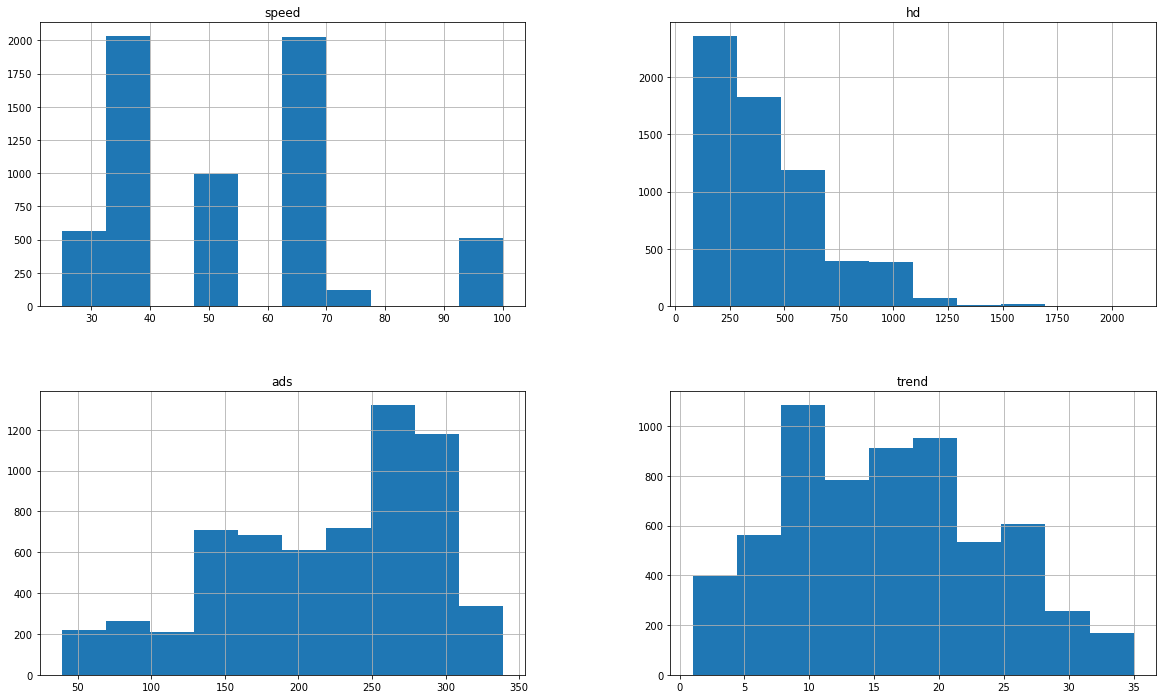

In [18]:
#Continuous Columns are 'speed','hd','ads',and 'trend'
#We use Histogram to see the data distribution

Columns=['speed','hd','ads','trend']

ComputerPricesData[Columns].hist(figsize=(20,12))
    

## Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "speed", there are around 2000 rows in data that has a value between 30 to 40.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

* **ads:** Selected. The distribution is good.
* **hd:** Selected. The distribution is good.
* **speed:** Selected. The distribution is good.
* **trend:** Selected. The distribution is good.

# Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

In this data no prominent outliers are present, hence, not treating outlier in this section

# Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic


In [16]:
# Finding how many missing values are there for each column
ComputerPricesData.isnull().sum()


price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

No missing values in this data!!

# Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

**Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

**Statistical measurement of relationship strength between variables**
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

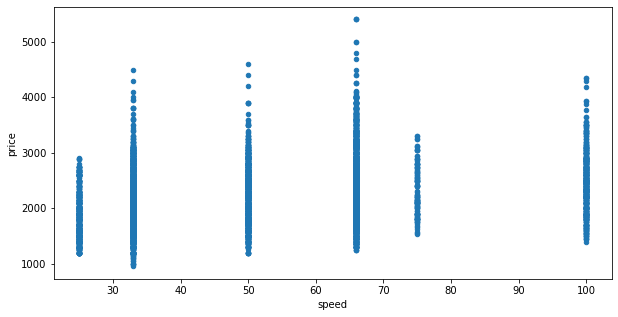

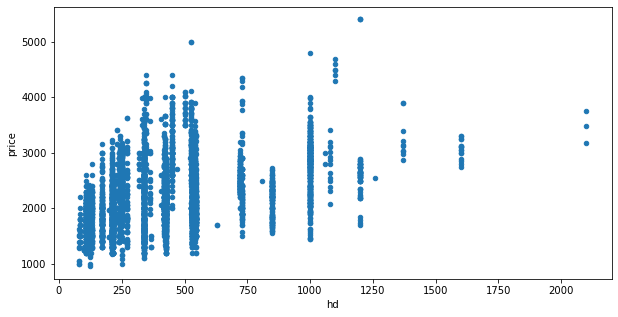

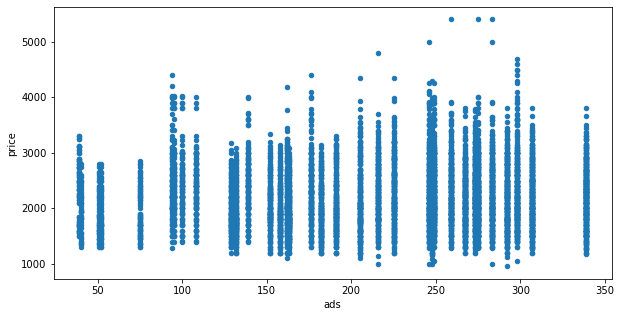

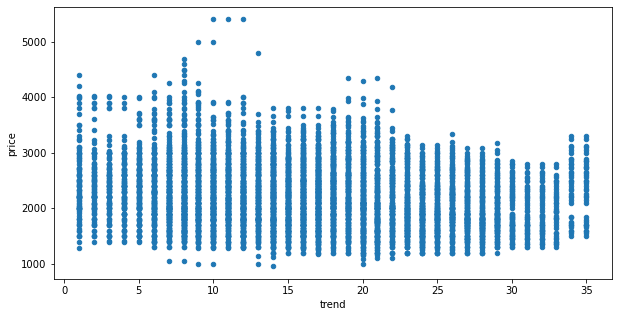

In [20]:
# Plotting scatter chart for each predictor vs the target variable

for K in Columns:
    ComputerPricesData.plot.scatter(x=K, y='price', figsize=(10,5))

### Scatter charts interpretation

**What should you look for in these scatter charts?**

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

* Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

* Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

* No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.



## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [23]:
# Calculating correlation matrix
ContinuousCols=['price','speed','hd','ads','trend']

# Creating the correlation matrix
CorrData=ComputerPricesData[ContinuousCols].corr()

CorrData

,price,speed,hd,ads,trend
price,1.000000,0.300976,0.430258,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,-0.323222,0.577790
ads,0.054540,-0.215232,-0.323222,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,-0.318553,1.000000


In [24]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrData['price'][abs(CorrData['price']>0.2)]

price    1.000000
speed    0.300976
hd       0.430258
Name: price, dtype: float64

**Final selected Continuous columns:**

'speed','hd','trend'

## Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

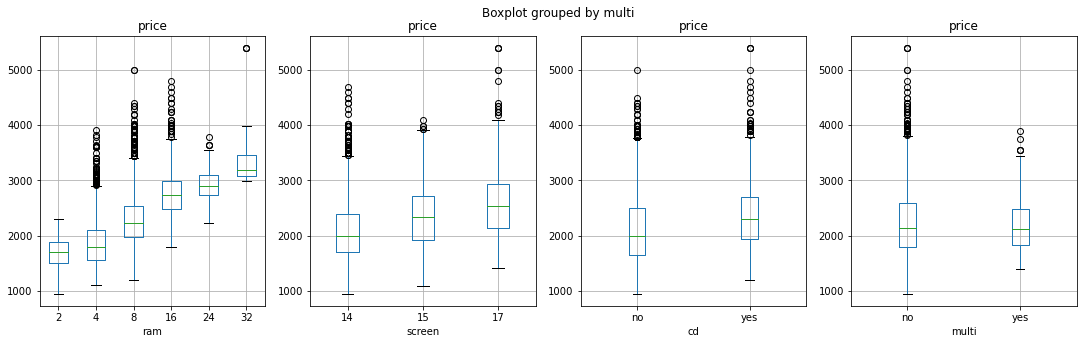

In [25]:
#Box Plot

Catcol=['ram', 'screen', 'cd', 'multi']

import matplotlib.pyplot as plt

    
fig, SubPlot=plt.subplots(nrows=1, ncols=len(Catcol), figsize=(18,5))

    
for ColName, i in zip(Catcol, range(len(Catcol))):
    ComputerPricesData.boxplot(column='price', by=ColName, ax=SubPlot[i])
        
        
        
    

### Box-Plots interpretation

What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.

In this data, all the categorical predictors looks correlated with the Target variable except "multi", it seems like a border case, as the boxes are close to each other.

We confirm this by looking at the results of **ANOVA test** below



## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true


In [27]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inp, tv, plist):
    from scipy.stats import f_oneway
    
    SelectedPredictors=[]
    
    for Predictor in plist:
        CotList=inp.groupby(Predictor)[tv].apply(list)
        AnovaResult=f_oneway(*CotList)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResult[1] < 0.05):
            print(Predictor, 'is correlated with', tv, '| P-Value:', AnovaResult[1])
            SelectedPredictors.append(Predictor)
        else:
            print(Predictor, 'is NOT correlated with', tv, '| P-Value:', AnovaResult[1])
        
    return(SelectedPredictors)
        

In [28]:
# Calling the function to check which categorical variables are correlated with target

plists=['ram', 'screen', 'cd', 'multi']

FunctionAnova(inp=ComputerPricesData, tv='price', plist=plists)

ram is correlated with price | P-Value: 0.0
screen is correlated with price | P-Value: 1.7979337838597882e-132
cd is correlated with price | P-Value: 5.439449136508735e-56
multi is NOT correlated with price | P-Value: 0.1877771427064562


['ram', 'screen', 'cd']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "multi". This is something we guessed by looking at the box plots!

**Final selected Categorical columns:**

'ram', 'screen', 'cd'

## Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [31]:
SelectedColumns=['speed','hd','trend','ram', 'screen', 'cd']

DataForML=ComputerPricesData[SelectedColumns]

In [32]:
DataForML.head()

,speed,hd,trend,ram,screen,cd
0,25,80,1,4,14,no
1,33,85,1,2,14,no
2,25,170,1,4,15,no
3,25,170,1,8,14,no
4,33,340,1,16,14,no


# Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()

In this data there is no Ordinal categorical variable which is in string format.

### Converting the binary nominal variable to numeric using 1/0 mapping

In [34]:
DataForML['cd'].replace({'no':0,'yes':1}, inplace=True)

In [38]:
DataForML.head()

,speed,hd,trend,ram,screen,cd
0,25,80,1,4,14,0
1,33,85,1,2,14,0
2,25,170,1,4,15,0
3,25,170,1,8,14,0
4,33,340,1,16,14,0


### Converting the nominal variable to numeric using get_dummies()

In [35]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

In [36]:
# Adding Target Variable to the data
DataForML_Numeric['price']=ComputerPricesData['price']

In [37]:
# Printing sample rows
DataForML_Numeric.head()

,speed,hd,trend,ram,screen,cd,price
0,25,80,1,4,14,0,1499
1,33,85,1,2,14,0,1795
2,25,170,1,4,15,0,1595
3,25,170,1,8,14,0,1849
4,33,340,1,16,14,0,3295


# Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [39]:
DataForML_Numeric.columns

Index(['speed', 'hd', 'trend', 'ram', 'screen', 'cd', 'price'], dtype='object')

In [40]:
#Splitting Data for trainig and testing

TargetVariable='price'
Predictors=['speed', 'hd', 'trend', 'ram', 'screen', 'cd']

x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=300)



## Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression

RegModel=LinearRegression()

print(RegModel)

#Create model for training
LREG=RegModel.fit(x_train, y_train)
Prediction=LREG.predict(x_test)

# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(x_train)))

LinearRegression()
R2 Value: 0.7011695764375119


In [42]:
# Printing some sample values of prediction

TestResultData=pd.DataFrame(data=x_test, columns=Predictors)
TestResultData[TargetVariable]=y_test
TestResultData[('Predicted'+TargetVariable)]=np.round(Prediction,2)

print(TestResultData[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0   1974         1472.34
1   1819         2010.35
2   1845         1720.31
3   1994         2057.63
4   2199         2277.74


In [50]:
#Calculating the error

TestResultData['APE']=100*((abs(TestResultData['price']-TestResultData['Predictedprice']))/TestResultData['price'])
                           
MAPE=np.mean(TestResultData['APE'])
MedianAPE=np.median(TestResultData['APE'])  

Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE

print('Mean Accuracy:',Accuracy)
print('Median Accuracy:',MedianAccuracy)
             


Mean Accuracy: 89.22377963563055
Median Accuracy: 92.04052718644158


In [51]:
# Defining a custom function to calculate accuracy
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE

def Accuracy_Score(Org, Pred):
    MAPE=np.mean(100*(np.abs(Org-Pred))/Org)
    return(100-MAPE)

# Custom Scoring MAPE calculation

from sklearn.metrics import make_scorer
Custome_Scorere=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=Custome_Scorere)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.81065815 91.86792133 92.28880856 88.89565581 88.57501587 89.43683652
 88.13989988 91.16388206 91.89831051 85.75591844]

Final Average Accuracy of the model: 89.78


# Decision Trees

In [56]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=10,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

DecisionTreeRegressor(max_depth=10)
R2 Value: 0.8890522516748602



##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1974          1432.0
1   1819          1758.0
2   1845          1916.0
3   1994          1869.0
4   2199          2521.0
Mean Accuracy on test data: 92.16951951255722
Median Accuracy on test data: 94.59598558929491


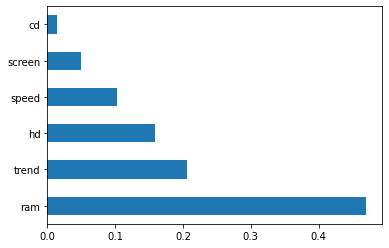

In [57]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


In [58]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.81065815 91.86775117 92.28880856 88.87321063 88.49790118 89.87524213
 88.10150252 91.0429496  92.00576198 85.74639349]

Final Average Accuracy of the model: 89.81


# Random Forest

In [60]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))



RandomForestRegressor(max_depth=10)
R2 Value: 0.9057356247058409



##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1974          1558.0
1   1819          2048.0
2   1845          1931.0
3   1994          2004.0
4   2199          2554.0


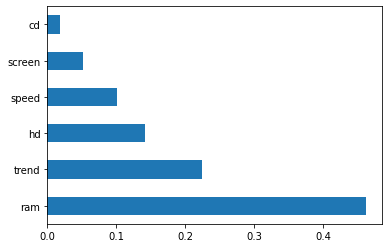

In [62]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


In [63]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 92.58461068304369
Median Accuracy on test data: 94.81483813273168


In [65]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.24623752 92.3312393  92.81045682 89.36621575 89.84885453 90.40523238
 89.3045014  92.32474649 93.27603845 85.51400916]

Final Average Accuracy of the model: 90.54


# AdaBoost

In [67]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=15)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9603692576447616



##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1974          1475.0
1   1819          2019.0
2   1845          2003.0
3   1994          1994.0
4   2199          2533.0


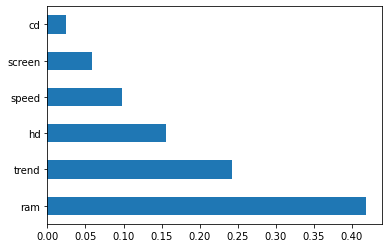

In [69]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


In [70]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


Mean Accuracy on test data: 93.03515305627971
Median Accuracy on test data: 95.01454487755858


In [72]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.20818742 93.55785636 94.03763743 89.58854406 89.64568186 91.76097553
 90.52860937 92.42897967 93.49041274 87.8787278 ]

Final Average Accuracy of the model: 91.21


# KNN

In [2]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

KNeighborsRegressor(n_neighbors=3)


NameError: name 'x_train' is not defined

In [ ]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


In [ ]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

In [ ]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\yogesh\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\yogesh\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\yogesh\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly clos